# XML File Creation

This notebook describe conditions for generation of ring road scenarios 

In [331]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [332]:
import numpy as np 

Traffic parameters

In [333]:
C = 0.5 # veh/h
u = 25 # m/s 
w = 5 # m/s 
k_x = C * (u + w) / (u * w)
k_c = C/u
print(f"kx: {k_x}")
print(f"kc: {k_c}")

kx: 0.12
kc: 0.02


In [334]:
N = 48
R = (N+2) / (k_c * np.pi * 2)
print(f"R: {R}")
print(f"Circle length: {2 * np.pi * R}")

R: 397.8873577297383
Circle length: 2499.9999999999995


In [336]:
%run ring_generator.py 48

Creating XML internal points
R: 397.8873577297383
Circle length: 2499.9999999999995


# Creating a graphml structure

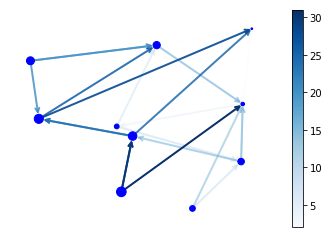

In [2]:
# %load https://networkx.github.io/documentation/stable/_downloads/ce2990bb6ab2556d9fce64416819d6c8/plot_directed.py
#! /usr/bin/env python
"""
==============
Directed Graph
==============

Draw a graph with directed edges using a colormap and different node sizes.

Edges have different colors and alphas (opacity). Drawn using matplotlib.
"""
# Author: Rodrigo Dorantes-Gilardi (rodgdor@gmail.com)

from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
# plt.show()


In [45]:
>>> G = nx.path_graph(3)
>>> bb = nx.betweenness_centrality(G)
>>> isinstance(bb, dict)
True
>>> nx.set_node_attributes(G, bb, 'betweenness')
>>> G.nodes[1]['betweenness']
1.0


1.0

In [46]:
>>> G = nx.path_graph(3)
>>> labels = []
>>> nx.set_node_attributes(G, labels, 'labels')
>>> labels.append('foo')
>>> G.nodes[0]['labels']
['foo']
>>> G.nodes[1]['labels']
['foo']
>>> G.nodes[2]['labels']
['foo']

['foo']

In [47]:
>>> G = nx.path_graph(3)
>>> attrs = {0: {'attr1': 20, 'attr2': 'nothing'}, 1: {'attr2': 3}}
>>> nx.set_node_attributes(G, attrs)
>>> G.nodes[0]['attr1']
20
>>> G.nodes[0]['attr2']
'nothing'
>>> G.nodes[1]['attr2']
3
>>> G.nodes[2]
{}

{}

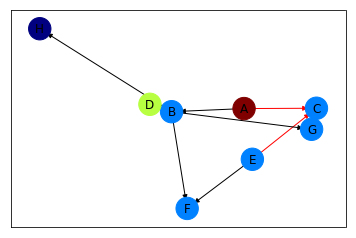

In [4]:
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=True)
plt.show()